1.3 - Median
----
----

*Definition*

The median in statistics is a measure of central tendency that represents the middle value of a dataset when it is ordered from smallest to largest. It divides the dataset into two equal halves: half of the data points are less than or equal to the median, and the other half are greater than or equal to the median. 

If the dataset has an odd number of observations, the median is the middle value. 

If the dataset has an even number of observations, the median is the average of the two middle values.

*Example 1*

Suppose a hospital has 9 patients. Each patient has received a certain number of consultations in the psychiatric service. We need to calculate what the median of that distribution is.

In [1]:
# Import pandas library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First, we initialize a list of lists
data = [['Patient_1', 2], ['Patient_2', 2], ['Patient_3', 3], ['Patient_4', 5], ['Patient_5', 7], ['Patient_6', 10],
        ['Patient_7', 15], ['Patient_8', 19], ['Patient_9', 50]]
 
# Then, we create a pandas DataFrame. We use "columns" to specify the columns names
df = pd.DataFrame(data, columns=['Patient', 'Qty Visits'])
 
# print dataframe.
df.head(9)

,Patient,Qty Visits
0,Patient_1,2
1,Patient_2,2
2,Patient_3,3
3,Patient_4,5
4,Patient_5,7
5,Patient_6,10
6,Patient_7,15
7,Patient_8,19
8,Patient_9,50


In [3]:
# Calculate the median of 'Qty Visits'
median = df['Qty Visits'].median()
print("Median of Qty Visits:", median)

Median of Qty Visits: 7.0


In this example, the value 7 leaves 50% of the data below and above. This occurs because we have an odd number of cases (n=9).

*Example 2*

Suppose we have a system to classify households in our city, based on their socioeconomic level. When touring an area of ​​the city, we have counted the number of homes that belong to each of the categories.

We are asked to find the median for that distribution of the data.

In [4]:
# First, we initialize a list of lists
data = [['Poor', 40], ['Low', 100], ['Medium-Low', 120], ['Medium', 150], ['High', 30]]
 
# Then, we create a pandas DataFrame. We use "columns" to specify the columns names
df = pd.DataFrame(data, columns=['Socioeconomic level', 'Qty homes'])

# Calculate the cumulative frequency and add it as a new column
df['Cumulative Frequency'] = df['Qty homes'].cumsum()
 
# print dataframe.
df.head(9)

,Socioeconomic level,Qty homes,Cumulative Frequency
0,Poor,40,40
1,Low,100,140
2,Medium-Low,120,260
3,Medium,150,410
4,High,30,440


In [5]:
# Calculate the total number of households
total_homes = df['Qty homes'].sum()

In [6]:
# Calculate the total median
median = total_homes/2

In [7]:
# Calculate the median
cumulative_sum = 0
median_category = None
for index, row in df.iterrows():
    cumulative_sum += row['Qty homes']
    if cumulative_sum >= total_homes / 2:
        median_category = row['Socioeconomic level']
        break

print("Total Qty homes:", total_homes)
print("The median is:", median)
print("Category of median:", median_category)

Total Qty homes: 440
The median is: 220.0
Category of median: Medium-Low


In this case we can see that the median is 220. If we look at the column called "Cumulative frequency", we will see that 220 is included within the range covered by the "Medium-low" category. That range starts at 141 and ends at 260.

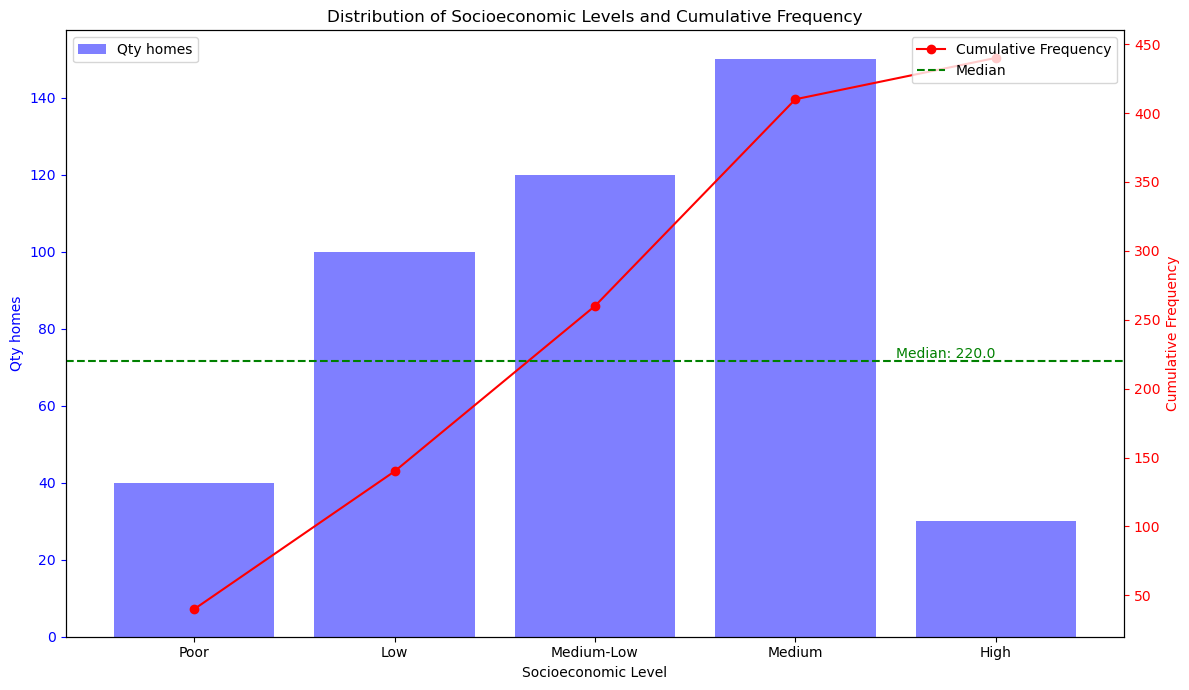

In [48]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 7))# Adjust figure size

# Plotting the bar chart for quantity of homes per socioeconomic level
ax1.bar(df['Socioeconomic level'], df['Qty homes'], color='b', alpha=0.5)
ax1.set_xlabel('Socioeconomic Level')
ax1.set_ylabel('Qty homes', color='b')
ax1.tick_params('y', colors='b')

# Creating a secondary y-axis to plot the cumulative frequency
ax2 = ax1.twinx()
ax2.plot(df['Socioeconomic level'], df['Cumulative Frequency'], color='r', marker='o')
ax2.set_ylabel('Cumulative Frequency', color='r')
ax2.tick_params('y', colors='r')

# Adding horizontal line for median
ax2.axhline(y=median, color='g', linestyle='--', label='Median')

# Annotating median value on the graph
ax2.text(df['Socioeconomic level'].iloc[-1], median, f'Median: {median:.1f}', ha='right', va='bottom', color='g')

# Adding legend
ax1.legend(['Qty homes'], loc='upper left')
ax2.legend(['Cumulative Frequency', 'Median'], loc='upper right')

plt.title('Distribution of Socioeconomic Levels and Cumulative Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()